## Bootstrap

Populating the interactive namespace from numpy and matplotlib


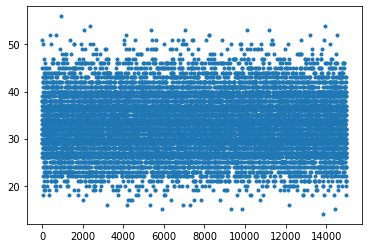

In [1]:
# отключение ворнингов
import warnings
warnings.filterwarnings('ignore')

# импорт библиотек
from scipy import stats
from tqdm import tqdm

import scipy
import scikits.bootstrap as bootstrap
import random

from matplotlib import pyplot as plt
%pylab inline
 
data = stats.poisson.rvs(33, size=15000)
results = bootstrap.ci(data=data, statfunction=scipy.mean)
 
plt.plot(data, '.')
plt.show()

In [2]:
def get_bootstrap_sample(x, n=10000):
    """
    Generates bootsrap sample of x with size n
    :param x: array
    :param n: bootstrap sample size
    """
    
    bootstrap_sample = np.zeros(n)
    for i in range(n):
        bootstrap_sample[i] = random.choice(x)
    return bootstrap_sample

In [3]:
def confidence_interval(x):
    """
    95% confidence interval for non binary data
    :param x: list
    """

    x_mean = np.mean(x)
    x_cnt = len(x)
    
    x_min = x_mean - 1.96*np.std(x_mean)/np.sqrt(x_cnt)
    x_max = x_mean + 1.96*np.std(x_mean)/np.sqrt(x_cnt)
    
    return x_min, x_max

In [4]:
# gererating 2 distributions

data1 = stats.poisson.rvs(33, size=15000)
data2 = stats.poisson.rvs(34.9, size=15000)

n = 10000

difs = np.zeros(n)
for i in tqdm(range(n)):
    mean1 = np.mean(get_bootstrap_sample(data1, n=15000))
    mean2 = np.mean(get_bootstrap_sample(data2, n=15000))

    difs[i] = mean1 - mean2
    
print(f'{n} differences between means done!')

diff_min, diff_max = confidence_interval(difs)

print(f'Confidence interval for difference is from {diff_min:.2f} to {diff_max:.2f}')

100%|██████████| 10000/10000 [25:06<00:00,  6.64it/s]

10000 differences between means done!
Confidence interval for difference is from -1.85 to -1.85
